# Assignment 3

In [45]:
#Import libraries
import time
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical


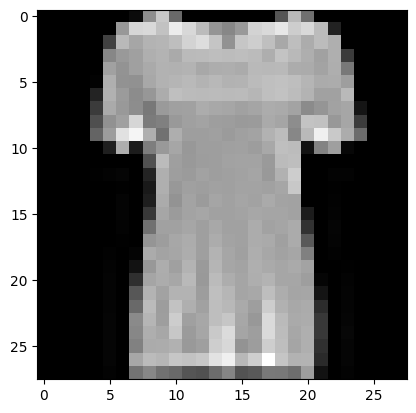

In [46]:
#Load the train and test sets
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")

x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

#Display a sample image
sample_img = x_train.iloc[10,:]
sample_img = np.reshape(sample_img, (28,28,1))
plt.imshow(sample_img, cmap = 'gray')
plt.show()


In [47]:
x_train.shape

(60000, 784)

In [48]:
# Reshaping for CNN Input: batch, height, width, channel
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [49]:
x_train.shape

(60000, 28, 28, 1)

# Classification with Convolutional Neural Networks

### Question 2: Your Own Network

In [50]:
# Own CNN model - by Munia
own_model = Sequential([Input((28,28,1)),
                          Conv2D(32, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Conv2D(64, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Conv2D(128, (3, 3), padding='same', activation='relu'),
                          Conv2D(128, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Conv2D(256, (3, 3), padding='same', activation='relu'),
                          Conv2D(256, (3, 3), padding='same', activation='relu'),
                          Conv2D(512, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Flatten(),
                          Dense(128, activation='relu'),
                          Dropout(0.5),
                          Dense(64, activation='relu'),
                          Dropout(0.5),
                          Dense(5, activation='softmax')
                          ])

In [51]:
# Compile the model
own_model.compile(
    optimizer = Adam(learning_rate=0.001),  # Using a small learning rate
    loss='categorical_crossentropy',  # Using 'sparse_categorical_crossentropy' as labels are integers
    metrics=['accuracy']
)

# Print the model summary
own_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,379,909 (9.08 MB)

 Trainable params: 2,379,909 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Record the start time
start_time = time.time()

# Train the model
own_model_history = own_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs= 10,
    validation_data = (x_test, y_test),
    verbose=1
)

# Record the end time
end_time = time.time()

# Calculate total training time
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time:.2f} seconds")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7653 - loss: 0.6176 - val_accuracy: 0.9738 - val_loss: 0.0917
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9751 - loss: 0.0962 - val_accuracy: 0.9817 - val_loss: 0.0699
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9819 - loss: 0.0650 - val_accuracy: 0.9769 - val_loss: 0.0831
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9848 - loss: 0.0561 - val_accuracy: 0.9861 - val_loss: 0.0575
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9871 - loss: 0.0462 - val_accuracy: 0.9771 - val_loss: 0.0828
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9860 - loss: 0.0478 - val_accuracy: 0.9835 - val_loss: 0.0752
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9887 - loss: 0.0371 - val_accuracy: 0.9836 - val_loss: 0.0610
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9896 - loss: 0.0340 - val_a

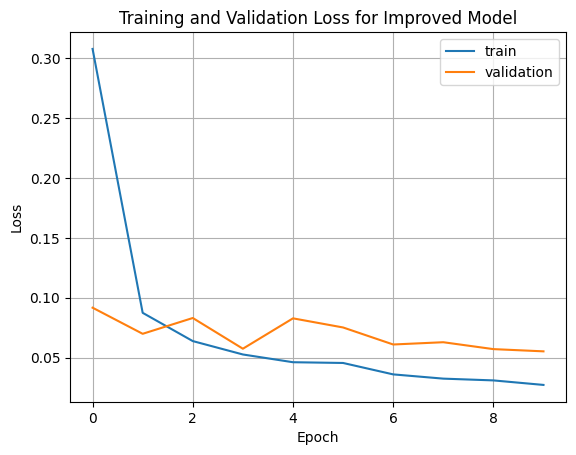

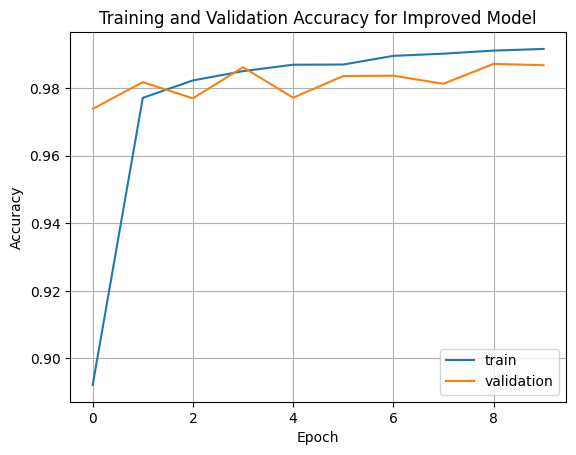

In [53]:
#Gather history results
own_model_train_loss = own_model_history.history["loss"]
own_model_train_acc = own_model_history.history["accuracy"]
own_model_val_loss = own_model_history.history["val_loss"]
own_model_val_acc = own_model_history.history["val_accuracy"]

#Plot the training and validation loss over the epochs
plt.title("Training and Validation Loss for Improved Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(own_model_train_loss, label = "train")
plt.plot(own_model_val_loss, label = "validation")
plt.legend()
plt.grid()
plt.show()

#Plot the training and validation accuracy over the epochs
plt.title("Training and Validation Accuracy for Improved Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(own_model_train_acc, label = "train")
plt.plot(own_model_val_acc, label = "validation")
plt.legend()
plt.grid()
plt.show()

In [54]:
# Save the model architecture, weights and optimizer state
own_model.save("own_model.keras")

In [55]:
# Load it back:
own_cnn_model = load_model("own_model.keras")
print("The model is loaded!")

# Evaluate and check the test scores
own_cnn_score = own_cnn_model.evaluate(x_test, y_test, verbose=1, return_dict = True)

print('Test loss:', own_cnn_score["loss"])
print('Test accuracy:', own_cnn_score["accuracy"])

The model is loaded!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9859 - loss: 0.0625
Test loss: 0.055283766239881516
Test accuracy: 0.9866999983787537
